<h1> Project: Credit Card Approval Analysis </h1>
<h2> Names: Jingzhi Yang</h2>
<h3><a href="https://yship1002.github.io">https://yship1002.github.io</a></h3>

<li><a href="#Motivation">Motivation</a></li>
<li><a href="#Project Goal">Project Goal</a></li>
<li><a href="#Background">Background</a></li>
<li><a href="#Dataset">Dataset</a></li>
<ol>Exploratory Data Analysis
    <li><a href="#Dataset 1: Credit Card Data from book 'Econometric Analysis'">Dataset 1: Credit Card Data from book "Econometric Analysis"</a></li>
    <li><a href="#Dataset 2: Cleaned Credit approval dataset from UCI">Dataset 2: Cleaned Credit approval dataset from UCI</a></li>
    <li><a href="#Summary of EDA:">Summary of EDA</a></li>
</ol>
<ol>Building Prediction Model
    <li><a href="#KNN">KNN</a></li>
    <li><a href="#Logistic Regression">Logistic Regression</a></li>
    <li><a href="#Findings of the model building section:">Summary of Model Building Section</a></li>
</ol>
<li><a href="#Oaxaca-Blinder-Kitagawa Decomposition">Oaxaca-Blinder-Kitagawa Decomposition</a></li>
<li><a href="#Conclusion">Conclusion</a></li>

<a id="Motivation"></a>
<h1>Motivation:</h1>
<p>Credit cards are great financial tool to have for everybody. Credit cards can reap lucrative rewards, build a credit history, increase purchase power as well as other benefits. Unfortuantely many people have experienced discrimination in credit card application process. Credit consumers are protected under The Equal Credit Opportunity Act (ECOA) and the federal agency has an obligation to make sure creditors adhere to the ECOA. More specifically the ECOA makes it illegal for creditors to discriminate based on color, income, national origin, sex, age as well as other factors defined in the ECOA. Unfortunately even though the ECOA is designed to protect credit card consumers, it is often difficult for credit card applicants to know whether they have been discriminated against or not. For example, under the ECOA credit card applicants are entitled to know the specific reasons why their applications are denied. When applicants ask for the reasons why they are denied a credit card, the reasons are usually vague such as too many opening accounts or income too low. Since creditors will never release their credit decision criteria, it is impossible for individual applicants to know whether they are discriminated against or not. Therefore, it is necessary to look at the application result by comparing the application results across multiple applicants using data science. In this project I will focus on two types of discrimination: gender discrimination and racial discrimination.</p>

<a id="Project Goal"></a>
<h1 style="text-align:left">Project Goal</h1>
<p>This project is meant to answer the following questions:</p>
<p>Question 1: Does gender and race play an important role in credit card approval decision?</p>
<p>Question 2: Are there gender or racial discrimination in credit approval decision? How much?</p>
<p>To answer these two questions I will first build KNN and Logistic Regression models to see if gender and race are important in credit card approval decision. Then I will be using Oaxaca-Blinder-Kitagawa decomposition, a regression analysis I learnt in my Economics of Discriminiation class to check if gender or racial discriminatino exists and quantify the discrimination in terms of percentage.</p>

<a id="Background"></a>
<h1>Background</h1>
<h2>Oaxaca-Blinder-Kitagawa Decomposition</h2>

<p>Oaxaca-Blinder-Kitagawa decomposition is widely used by quantitative social scientists to quantify discrimination between two groups of people. The basic idea is to control for as many independent variables as possible to make two groups 'identical' and see if there are still unexplained difference in dependent variables. This method was first proposed to study the gender wage gap. I will use this example to illustrate the method.</p>

<p>Let us say that wage (W) is dependent on education (ED), experience (EXP) and whether the worker is unionized (UNION). We can run two linear regression models to estimate wage for both men and women</p>
<p>$W_m=a_m+b_m{ED}_m+c_mEXP_m+d_mUNION_m$</p>
<p>$W_f=a_f+b_f{ED}_f+c_fEXP_f+d_fUNION_f$</p>
<p>subscript m denotes male and f denotes female</p>
<p>If we subsitute average $\overline{ED}_m, \overline{EXP}_m, \overline{UNION}_m,\overline{ED}_f, \overline{EXP}_f, \overline{UNION}_f$ for both male and female group then the raw gender wage gap $W_m-W_f$ is the following:</p>

<p>$W_m-W_f=a_m+b_m\overline{ED}_m+c_m\overline{EXP}_m+d_m\overline{UNION}_m-$ <br>
$\hspace{3cm}(a_f+b_f\overline{ED}_f+c_f\overline{EXP}_f+d_f\overline{UNION}_f)$</p>

<p>To isolate explained and unexplained gender wage gap we do a simple math trick: <br>
add and subtract $b_m\overline{ED}_f,c_m\overline{EXP}_f, f_m\overline{UNION}_f$ on the right hand side of equation</p>

<p>$W_m-W_f=b_m(\overline{ED}_m-\overline{ED}_f)+c_m(\overline{EXP}_m-\overline{EXP}_f)+d_m(\overline{UNION}_m-\overline{UNION}_f)+$ <br>
$\hspace{3cm}a_m-a_f+(b_m-b_f)\overline{ED}_f+(c_m-c_f)\overline{EXP}_f+(d_m-d_f)\overline{UNION}_f$</p>
<p>The sum of first three terms on the right hand is the explained part of wage gap due to gender difference in education, experience and whether unionized and the sum of last four terms are the unexplained part of wage gap that might be discrimination</p>

<a id="Dataset"></a>
<h1 style="text-align:left">Datasets</h1>
<p>The following two datasets have all the necessary information I need in order to build prediction model and quantify discrimination in credit card application. I also provided descriptions of two datasets as well as how I am going to use them.</p>
<p>Dataset 1: <a href="https://www.kaggle.com/datasets/dansbecker/aer-credit-card-data?resource=download">Credit Card Data from book "Econometric Analysis"</a></p>
<p>This is a dataset attached to the book 'Econometric Analysis' by William Greene. I am using this dataset because it is very clean</p>
<p>Dataset 2: <a href="https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data">Cleaned Credit approval dataset from UCI</a></p>
<p>This Kaggle dataset is originally from UCI machine learning repository. Kaggle User SAMUEL CORTINHAS have cleaned the <a href="https://archive.ics.uci.edu/ml/datasets/Credit+Approval?msclkid=200008bdc4a311ec9f500a3245a2bfb1">original UCI data</a> by filling missing values and inferring feature names from the raw dataset. This step is necessary in order to get more context and make this dataset easier to use. I will be using this cleaned version as a starting point of my analysis.</p>

<a id="Collaboration Plan"></a>
<h1 style="text-align:left">Collaboration Plan</h1>
<p>There is no collaboration plan because Jingzhi Yang will be the only one doing this project</p>

<h1 style="text-align:left">Exploratory Data Analysis</h1>
<a id="Dataset 1: Credit Card Data from book 'Econometric Analysis'"></a>
<h2 style="text-align:left">Dataset 1: Credit Card Data from book 'Econometric Analysis'</h2>
<p>The first step is to load the datasets.</p>

<p>First the income here is per 10000. We need to rescale it. Second although panda infers the data types correctly, we'd be better off to map 'card'column to 1 or 0 to make our model training easier.</p>

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from Oaxaca import Oaxaca
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
df_big=pd.read_csv("../data/Big_Data.csv")
df_big['income']=df_big['income']*10000
df_big['card']=df_big['card'].map({
    "yes":1,
    "no":0
})
display(df_big.head())
df_big.dtypes

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,45200.0,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,24200.0,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,45000.0,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,25400.0,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,97867.0,0.067051,546.503300,yes,no,2,64,1,5


card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

<h2>What is the default rate distribution of this dataset?</h2>
<p>It seems like majority of people have less than or equal to 2 defaults in the history</p>

Text(0.5, 1.0, 'Default Rate Distribution')

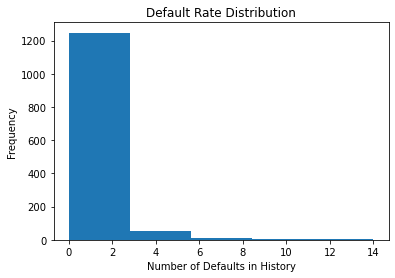

In [3]:
plt.hist(df_big['reports'],bins=5)
plt.ylabel('Frequency')
plt.xlabel("Number of Defaults in History")
plt.title('Default Rate Distribution')

<h2>How does default rate affect credit card applications?</h2>
<p>As expected, the more defaults you have, the less likely you will get approved. In fact, if you have more than two defaults you have less than 20% chance to get approved.</p>

Text(0.5, 1.0, 'Approval Rate Based on Number of Defaults')

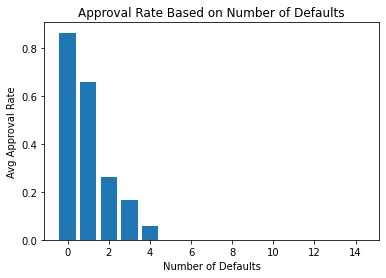

In [4]:
plt.bar(df_big.groupby('reports')['card'].mean().index,df_big.groupby('reports')['card'].mean().values)
plt.ylabel("Avg Approval Rate")
plt.xlabel("Number of Defaults")
plt.title("Approval Rate Based on Number of Defaults")

<h2>What is the income distribution of this dataset?</h2>
<p>Majority of the people earned less than 60000 a year</p>

Text(0.5, 1.0, 'Income Distribution')

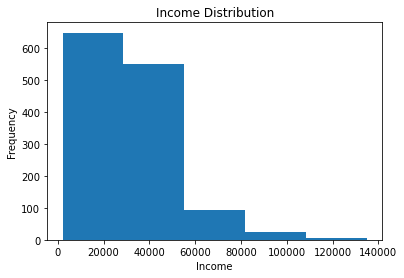

In [6]:
plt.hist(df_big['income'],bins=5)
plt.ylabel('Frequency')
plt.xlabel("Income")
plt.title('Income Distribution')

<h2>How does income affect credit card applications?</h2>
<p>As expected, the more income you have, the more likely you will get approved</p>

Text(0.5, 1.0, 'Avg Income for Approved and Not Approved Applicants')

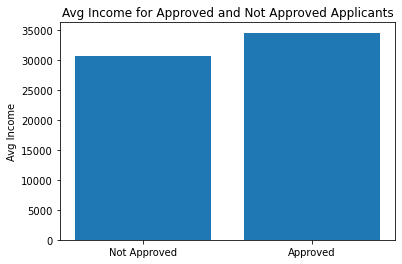

In [7]:
plt.bar(['Not Approved','Approved'],df_big.groupby('card')['income'].mean().values)
plt.ylabel("Avg Income")
plt.title("Avg Income for Approved and Not Approved Applicants")

<h2>What is the age distribution of this dataset?</h2>
<p>Most credit card applicants are in their mid 30s</p>

Text(0.5, 1.0, 'Age Distribution')

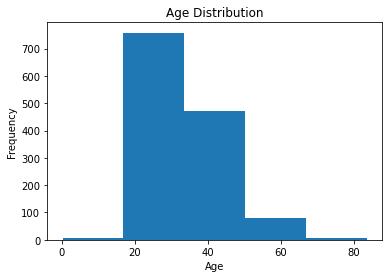

In [8]:
plt.hist(df_big['age'],bins=5)
plt.ylabel('Frequency')
plt.xlabel("Age")
plt.title('Age Distribution')

<h2>How does age affect credit card applications?</h2>
<p>Surprisingly age doesn't affect application too much. People always assume that the older you are the more financially stable you are but it doesn't appear to the case here.</p>

Text(0.5, 1.0, 'Avg Age for Approved and Not Approved Applicants')

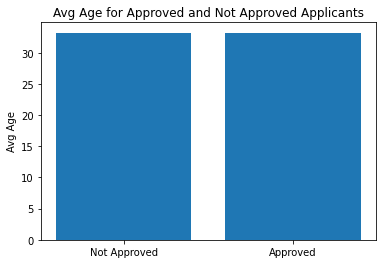

In [9]:
plt.bar(['Not Approved','Approved'],df_big.groupby('card')['age'].mean().values)
plt.ylabel("Avg Age")
plt.title("Avg Age for Approved and Not Approved Applicants")

<a id="Dataset 2: Cleaned Credit approval dataset from UCI"></a>
<h2 style="text-align:left">Dataset 2: Cleaned Credit approval dataset from UCI</h2>
<p>The first step is to load the datasets and check data types</p>

<p>It looks like panda infer the data types correctly.</p>

In [10]:
df_small=pd.read_csv("../data/Small_Data.csv")
display(df_small.head())
df_small.dtypes

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

<h2>What is the Job distribution of applicants?</h2>
<p>It looks like a lot of people work in energy sector</p>

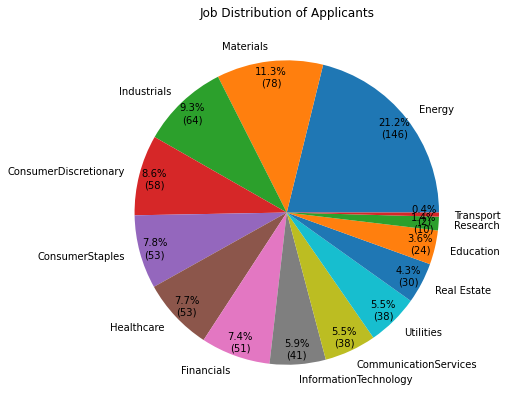

In [11]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
plt.figure(figsize =(10, 7))
plt.title("Job Distribution of Applicants")
a=plt.pie(x=df_small['Industry'].value_counts(),
        labels=df_small['Industry'].value_counts().index,
        autopct=lambda pct: func(pct, df_small['Industry'].value_counts()),
         labeldistance=1.1,
         pctdistance=0.9,)

<h2>How does job types affect credit card application?</h2>
<p>Interestingly people working at utilities industry have the highest avg approval rate. It is probably because utility jobs are financially stable.</p>

Text(0.5, 1.0, 'Avg Approval Rate By Industry')

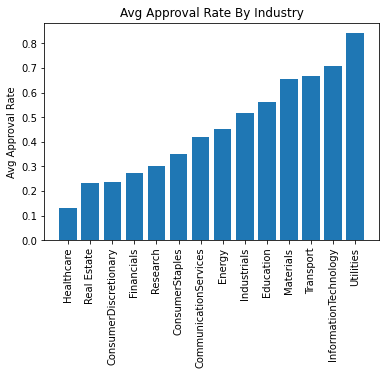

In [12]:
plt.bar(df_small.groupby('Industry')['Approved'].mean().sort_values().index,df_small.groupby('Industry')['Approved'].mean().sort_values().values)
plt.ylabel("Avg Approval Rate")
plt.xticks(rotation=90)
plt.title("Avg Approval Rate By Industry")

<h2>What is the Ethnicity distribution of applicants?</h2>
<p>Majority of the applicants are white followed by black applicants</p>

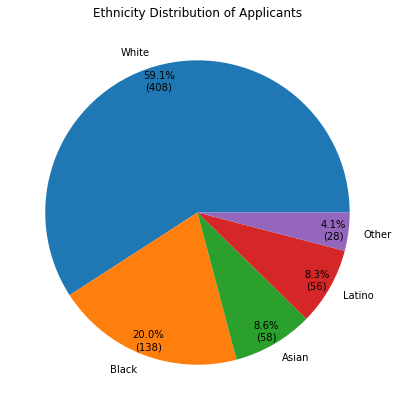

In [13]:
plt.figure(figsize =(10, 7))
plt.title("Ethnicity Distribution of Applicants")
a=plt.pie(x=df_small['Ethnicity'].value_counts(),
        labels=df_small['Ethnicity'].value_counts().index,
        autopct=lambda pct: func(pct, df_small['Ethnicity'].value_counts()),
         labeldistance=1.1,
         pctdistance=0.9)

<h2>What are the approval rates for black and non-black applicants?</h2>
<p>Non-black applicants are significantly favored</p>

Text(0.5, 1.0, 'Approval Rate Based on Ethnicity')

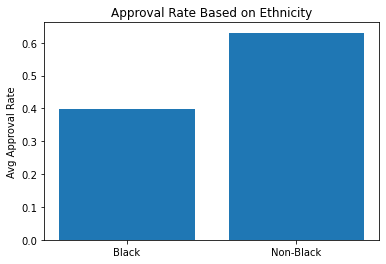

In [14]:
df_small['is_black']=[1 if i=="Black" else 0 for i in df_small['Ethnicity']]

plt.bar(["Black","Non-Black"],df_small.groupby('is_black')['Approved'].mean().values)
plt.ylabel("Avg Approval Rate")
plt.title("Approval Rate Based on Ethnicity")

<h2>What is the Gender distribution of applicants?</h2>
<p>We can see that number of male applicants are twice as much as female applicants</p>

Text(0.5, 1.0, 'Gender Distribution of Applicants')

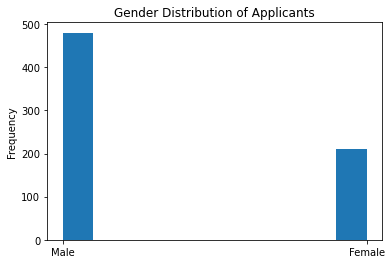

In [15]:
df_small['Gender_label']=["Male" if i==1 else "Female" for i in df_small['Gender']]
plt.hist(df_small['Gender_label'])
plt.ylabel('Frequency')
plt.title("Gender Distribution of Applicants")

<h2>What are the approval rates for male and female applicants?</h2>
<p>Male applicants are more favored than female applicants</p>

Text(0, 0.5, 'Avg Approval Rate')

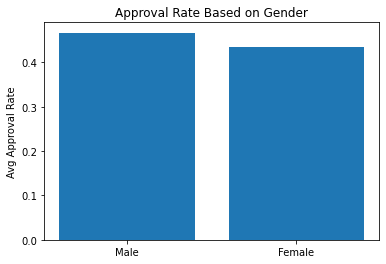

In [16]:
plt.bar(["Male","Female"],df_small.groupby('Gender')['Approved'].mean().values)
plt.title("Approval Rate Based on Gender")
plt.ylabel("Avg Approval Rate")

<a id="Summary of EDA:"></a>
<h2>Summary of EDA</h2>
<p>From EDA we know that approval rate for non-black applicants are a lot higher than the one for black aplicants. The approval rate for male applicants are slightly higher than the one for female applicants. This preliminary result doesn't necessarily show that gender discrimination doesn't exist because we didn't control for other factors such as credit score. One way to explore whether race and gender are important in credit card decision is to build a prediction model with and without race and gender to see if this will affect accuracy which will be covered in the next section.</p>

<a id="KNN"></a>
<h1>Building Models</h1>
<p>In this section, I will build two prediction models:KNN and logistic regression to see if gender and ethnicity play an important role in credit card approval decision. I am using KNN and logistic regression because KNN is non-linear classifier and logistic regression is a linear classifier. I want to use both linear and non-linear classifiers to compare the results to add credibility.</p>
<h2>Part1: k-Nearest Neighbors(KNN)</h2>

<p>Using KNN model to predict application result with all the features followed by KNN model without considering gender and the other without considering ethnicity. We want to see if gender and race play an important role in credit card decision</p>

Text(0, 0.5, 'Accuracy')

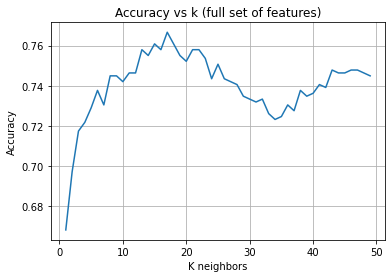

In [17]:
k_list=list(range(1,50))
accuracyscore=[]
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    scaler=StandardScaler()
    vec = DictVectorizer(sparse=False)
    pipeline = Pipeline([
        ("vec",vec),
        ("scaler", scaler),
        ("model", model)
    ])
    features=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer','is_black', 
              'YearsEmployed', 'Employed', 'CreditScore', 'ZipCode', 'Income']
    # define the training data
    X_train = df_small[features]
    y_train = df_small['Approved']
    X_train=X_train.to_dict(orient="records")
    
    accuracyscore.append(cross_validate(pipeline, X_train, y_train, cv=10,scoring="accuracy",return_train_score=True)['test_score'].mean())
plt.plot(k_list,accuracyscore)
plt.title("Accuracy vs k (full set of features)")
plt.grid()
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")

</p>Now let us remove Gender to see if it will affect accuracy. It seems like removing gender doesn't affect the accuracy</p>

Text(0, 0.5, 'Accuracy')

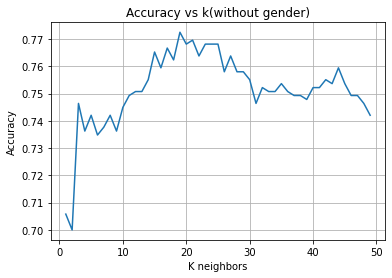

In [18]:
k_list=list(range(1,50))
accuracyscore=[]
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    scaler=StandardScaler()
    vec = DictVectorizer(sparse=False)
    pipeline = Pipeline([
        ("vec",vec),
        ("scaler", scaler),
        ("model", model)
    ])
    features_withoutgender=['Age', 'Debt', 'Married', 'BankCustomer','is_black', 
              'YearsEmployed', 'Employed', 'CreditScore', 'ZipCode', 'Income']
    # define the training data
    X_train = df_small[features_withoutgender]
    y_train = df_small['Approved']
    X_train=X_train.to_dict(orient="records")
    
    accuracyscore.append(cross_validate(pipeline, X_train, y_train, cv=10,scoring="accuracy",return_train_score=True)['test_score'].mean())
plt.plot(k_list,accuracyscore)
plt.title("Accuracy vs k(without gender)")
plt.grid()
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")

</p>Now let us remove Ethnicity to see if it will affect accuracy. It seems like removing ethnicity decreases the accuracy</p>

Text(0, 0.5, 'Accuracy')

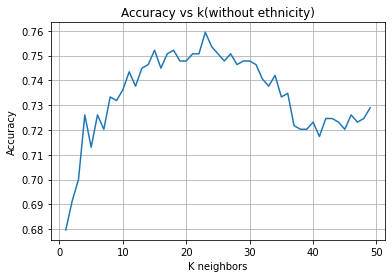

In [19]:
k_list=list(range(1,50))
accuracyscore=[]
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    scaler=StandardScaler()
    vec = DictVectorizer(sparse=False)
    pipeline = Pipeline([
        ("vec",vec),
        ("scaler", scaler),
        ("model", model)
    ])
    features_withoutrace=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 
              'YearsEmployed', 'Employed', 'CreditScore', 'ZipCode', 'Income']
    # define the training data
    X_train = df_small[features_withoutrace]
    y_train = df_small['Approved']
    X_train=X_train.to_dict(orient="records")
    
    accuracyscore.append(cross_validate(pipeline, X_train, y_train, cv=10,scoring="accuracy",return_train_score=True)['test_score'].mean())
plt.plot(k_list,accuracyscore)
plt.title("Accuracy vs k(without ethnicity)")
plt.grid()
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")

<a id="Logistic Regression"></a>
<h2>Part2: Logistic Regression</h2>

<p>Using Logistic Regression model to predict application result. Like we did in KNN model, we will start with logistic regression with full set of features followed by one without gender and the other without race. We want to see if gender and race play an important role in credit card decision</p>

In [20]:
model = LogisticRegression(random_state=20)
scaler=StandardScaler()
vec = DictVectorizer(sparse=False)
pipeline = Pipeline([
    ("vec",vec),
    ("scaler", scaler),
    ("model", model)
])
features=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'is_black',
              'YearsEmployed', 'Employed', 'CreditScore', 'ZipCode', 'Income']
# define the training data
X_train = df_small[features]
y_train = df_small['Approved']
X_train=X_train.to_dict(orient="records")

print("Accuracy with full set of features: {}".format(cross_validate(pipeline, X_train, y_train, cv=10,scoring="accuracy",return_train_score=True)['test_score'].mean()))


Accuracy with full set of features: 0.7623188405797101


</p>Now let us remove gender to see if it will affect accuracy. It seems like removing gender doesn't affect the accuracy which agrees with what we found out in KNN model</p>

In [21]:
model = LogisticRegression(random_state=20)
scaler=StandardScaler()
vec = DictVectorizer(sparse=False)
pipeline = Pipeline([
    ("vec",vec),
    ("scaler", scaler),
    ("model", model)
])
features_withoutgender=['Age', 'Debt', 'Married', 'BankCustomer', 'is_black',
              'YearsEmployed', 'Employed', 'CreditScore', 'ZipCode', 'Income']
# define the training data
X_train = df_small[features_withoutgender]
y_train = df_small['Approved']
X_train=X_train.to_dict(orient="records")

print("Accuracy without gender: {}".format(cross_validate(pipeline, X_train, y_train, cv=10,scoring="accuracy",return_train_score=True)['test_score'].mean()))


Accuracy without gender: 0.763768115942029


</p>Now let us remove Ethnicity to see if it will affect accuracy. It seems like removing ethnicity decreases the accuracy which agrees with what we found out in KNN model</p>

In [23]:
model = LogisticRegression(random_state=20)
scaler=StandardScaler()
vec = DictVectorizer(sparse=False)
pipeline = Pipeline([
    ("vec",vec),
    ("scaler", scaler),
    ("model", model)
])
features_withoutrace=['Gender','Age', 'Debt', 'Married', 'BankCustomer', 
              'YearsEmployed', 'Employed', 'CreditScore', 'ZipCode', 'Income']
# define the training data
X_train = df_small[features_withoutrace]
y_train = df_small['Approved']
X_train=X_train.to_dict(orient="records")

print("Accuracy without ethnicity: {}".format(cross_validate(pipeline, X_train, y_train, cv=10,scoring="f1",return_train_score=True)['test_score'].mean()))


Accuracy without ethnicity: 0.7116827082522499


<a id="Findings of the model building section:"></a>
<h2>Summary of Model Building Section:</h2>
<p>The results from KNN and logistic regression model agree with each other. Gender doesn't play a role in credit card decision but ethnicity does. We can verify our findings using Oaxaca-Blinder-Kitagawa decomposition in the following section<p>

<a id="Oaxaca-Blinder-Kitagawa Decomposition"></a>
<h1>Oaxaca-Blinder-Kitagawa Decomposition</h1>

<p>We will be using <a href="https://www.statsmodels.org/dev/generated/statsmodels.stats.oaxaca.OaxacaBlinder.html">statsmodel Oaxaca package</a> to perform analysis. If you forget what Oaxaca-Blinder-Kitagawa Decomposition is ( I know you didn't finish reading those boring math ) you can go to <a href="#Background">Background</a> to review.</p> It is important you understand what is explained and unexplained part of the gap.

<h2>Is there gender discrimination in credit card application?</h2>
<p>The raw gender gap is only 3.13% which means that men are only 3.13% more likely than women to get approved which is a good news for feminists. Controlling for debt,income, ethnicity, employed status, previous bank relationship, credit score and default rate, we found that in this 3.13% gap between men and women, gender discrimination only accounts for 19.59% of that 3.13% gap. This effectively shows that gender discrimination is minimal.</p>

In [24]:
by="Gender"
endog="Approved"
features=['Debt',"Income",'is_black',"Employed","BankCustomer","CreditScore","PriorDefault"]
df_numarray=pd.get_dummies(df_small[[endog,by]+features], drop_first=True).values
ox = Oaxaca(df_numarray, by=1, endo=0, debug=True)
unexplained,explained,gap=ox.two_fold(round_val=10)
print("Potential Discrimination: {}%".format(unexplained/gap*100))

These are the attempted split values: Float64Index([1.0, 0.0], dtype='float64')
Unexplained Effect: 0.006121929
Explained Effect: -0.037371929
Gap: -0.03125
Potential Discrimination: -19.5901728%


<h2>Is there racial discrimination on black folks in credit card application?</h2>
<p>The raw racial gap is 23.19% which means that non-black applicants are 23.19% more likely than black applicants to get approved. Controlling for gender, debt,income, ethnicity, employed status, previous bank relationship, credit score and default rate we found that in this 23.19% gap between black and non-black applicants, racial discrimination accounts for 31.68% of that 23.19% gap. This effectively shows that racial discrimination exists and contributes significantly to the racial gap in credit card approval decision.</p>

In [25]:
by="is_black"
endog="Approved"
#'Debt','Age',"Income",'Industry','Ethnicity',"Employed","Citizen","PriorDefault","Married"
features=['Gender','Debt','Age',"Income","Employed","BankCustomer","CreditScore","PriorDefault"]
df_numarray=pd.get_dummies(df_small[[endog,by]+features], drop_first=True).values
ox = Oaxaca(df_numarray, by=1, endo=0, debug=True)
unexplained,explained,gap=ox.two_fold(round_val=10)
print("Potential Discrimination: {}%".format(unexplained/gap*100))

These are the attempted split values: Float64Index([0.0, 1.0], dtype='float64')
Unexplained Effect: -0.0734653685
Explained Effect: -0.1584186894
Gap: -0.231884058
Potential Discrimination: 31.681940161664755%


<a id="Conclusion"></a>
<h1>Conclusion</h1>
<p>This project shows that gender discrimination is minimal in credit card approval decision and racial discrimination is significant in credit card approval decision. There are many other types of discrimination that can be studied in a similar way. For example in EDA section, we found that job types can affect approval rate significantly. A possible extension of this project is to explore job types discrimination in credit card approval decisions. </p>

<p>This study has its own limitations. One limitation of this study is that our analysis is based on using two small datasets(around 400 observations). A future improvement of this study can be finding a bigger dataset that includes more observations.</p>

<p>If you are interested in learning more about racial discrimination in credit card industry, check out this paper by Andrea Freeman <a href="https://scholarship.law.unc.edu/nclr/vol95/iss4/4/">'Racism in the Credit Card Industry'</a></p>
